In [1]:
import pandas as pd

In [33]:
cars=pd.read_csv(r"D:\temp\cars_selling.csv", usecols=["name","seller","offerType","price","vehicleType","gearbox","fuelType"])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [70]:
cars["vehicleType"].value_counts()

limousine     95245
kleinwagen    79607
kombi         67212
bus           30048
cabrio        22661
coupe         18809
suv           14545
andere         3340
1998              2
2005              2
1996              1
1992              1
Name: vehicleType, dtype: int64

In [57]:
filter1=cars.vehicleType!=("1998")
filter2=cars.vehicleType!=("1996")
filter3=cars.vehicleType!=("1992")
filter4=cars.vehicleType!=("2005")

In [75]:
cars3=cars[filter1 & filter2 & filter3 & filter4]

In [76]:
cars3.vehicleType=cars2.vehicleType.astype('category')

In [79]:
cars3.dropna(inplace=True)

<ipython-input-79-f21c2b8578f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars3.dropna(inplace=True)


In [92]:
cars3.price=cars3.price.astype("int")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [93]:
cars3.price.max()

2147483647

In [94]:
cars3.price.mean()

15902.36206089906

In [103]:
cars3.sort_values(by="price").tail(20)


,name,seller,offerType,price,vehicleType,gearbox,fuelType
359164,Tausche_BMW_E46_Touring_Diesel,privat,Angebot,10000000,kombi,manuell,diesel
363730,Vw_Passat_35i_1.8_schlachtfest,privat,Angebot,10000000,kombi,manuell,benzin
54295,Mazda_5_2.0_CD_DPF_Exclusive,privat,Angebot,10000000,bus,manuell,diesel
172120,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,privat,Angebot,10000000,coupe,manuell,benzin
14663,Tausch_moeglich_Polo_vw_n9,privat,Angebot,11111111,coupe,manuell,benzin
127880,Golf_4_laesst_sich_nicht_oeffnen,privat,Angebot,11111111,limousine,manuell,benzin
210953,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,privat,Angebot,11111111,limousine,manuell,benzin
311220,Wer_will_mich_kleinen_polo_6n1,privat,Angebot,12345678,kleinwagen,manuell,benzin
242143,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,privat,Angebot,12345678,limousine,manuell,benzin
288131,tausche_o_verkaufe,privat,Angebot,12345678,kombi,manuell,benzin


In [115]:
from matplotlib import pyplot as ppl
%matplotlib inline

In [99]:
wykres=ppl.plot(cars3.price)

In [100]:
wykres

In [111]:
cars3.fuelType.value_counts().index

Index(['benzin', 'diesel', 'lpg', 'cng', 'hybrid', 'andere', 'elektro'], dtype='object')

<BarContainer object of 7 artists>

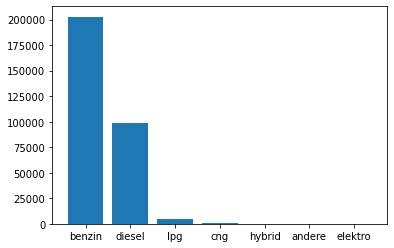

In [117]:
ppl.bar(cars3.fuelType.value_counts().index, cars3.fuelType.value_counts().values)

In [120]:
typ_cena=cars3.groupby(by="vehicleType").price.mean()

<BarContainer object of 8 artists>

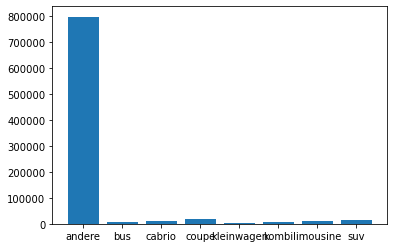

In [122]:
ppl.bar(typ_cena.index, typ_cena.values)

In [123]:
filter_nadwozie=cars3.vehicleType!='andere'

In [136]:
typ_cena=cars3[filter_nadwozie].groupby(by="vehicleType").price.sum().sort_values(ascending=False)

<BarContainer object of 8 artists>

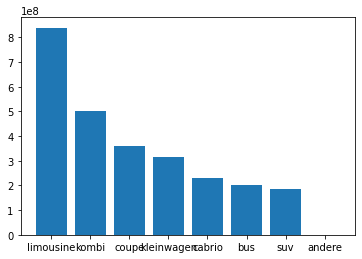

In [137]:
ppl.bar(typ_cena.index, typ_cena.values)

<BarContainer object of 8 artists>

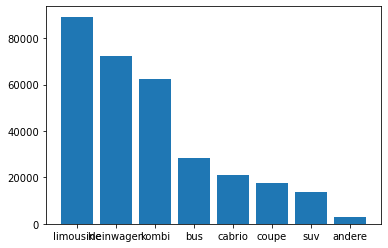

In [135]:
ppl.bar(cars3.vehicleType.value_counts().index, cars3.vehicleType.value_counts().values )